<a href="https://colab.research.google.com/github/ranjithnrjk/PyTorch_basics/blob/main/SimpleNeuralNetwork_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!curl -O https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3858  100  3858    0     0  14524      0 --:--:-- --:--:-- --:--:-- 14558


In [ ]:
df = pd. read_csv('/content/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
class Model(nn.Module):
    # In feature
    # HL 1
    # HL 2
    # Out feature

    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.in_features = in_features
        self.h1 = h1
        self.h2 = h2
        self.out_features = out_features
        self.fc1 = nn.Linear(in_features=in_features, out_features=h1)
        self.fc2 = nn.Linear(in_features=h1, out_features=h2)
        self.out = nn.Linear(in_features=h2, out_features=out_features)

    def forward(self, x):
        "This function moves the data forward from bottom to top of neural network"
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
print(f"Mapping ==> {dict(zip(range(len(encoder.classes_)), encoder.classes_))}")

Mapping ==> {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :4].values
Y = df['species'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=41)

In [ ]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
model = Model()

In [ ]:
# Set the criterior/Loss Function to see how far the model is fome desired state
criterion = nn.CrossEntropyLoss()

# Set the optimizer and learning rate to change the model parameters based the criteriorn ouptput
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [ ]:
# Train Loop
running_loss = []
epochs = 100
for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(x_train)

    loss = criterion(y_pred, y_train) # Measure the error/loss in the models predictions

    running_loss.append(loss.detach().numpy()) # Keep track of the losses

    if i % 10 == 0: # Print loss and epoch after every 10 epochs
        print(f'Epoch: {i} ==> Loss: {loss}')

    # Back propogation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 ==> Loss: 1.1623218059539795
Epoch: 10 ==> Loss: 0.9159645438194275
Epoch: 20 ==> Loss: 0.7008466720581055
Epoch: 30 ==> Loss: 0.5129246711730957
Epoch: 40 ==> Loss: 0.42385345697402954
Epoch: 50 ==> Loss: 0.36070793867111206
Epoch: 60 ==> Loss: 0.2795538902282715
Epoch: 70 ==> Loss: 0.1908562332391739
Epoch: 80 ==> Loss: 0.12512682378292084
Epoch: 90 ==> Loss: 0.08837684243917465


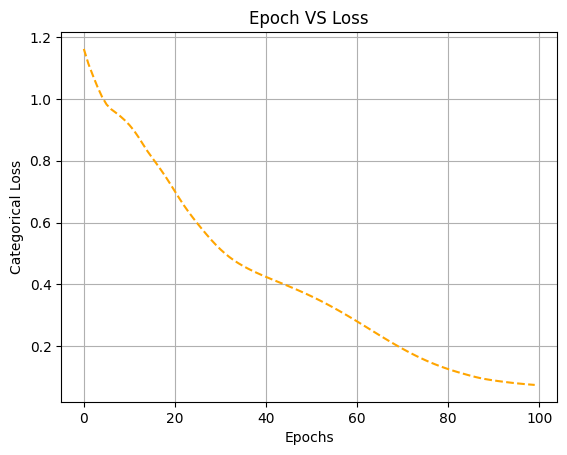

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), running_loss, '--', c='orange')
plt.title('Epoch VS Loss')
plt.ylabel('Categorical Loss')
plt.xlabel('Epochs')
plt.grid()
plt.show()

In [ ]:
print(4)

4


# Simple Neural Network on IRIS dataset

### Import libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data prep

In [2]:
data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


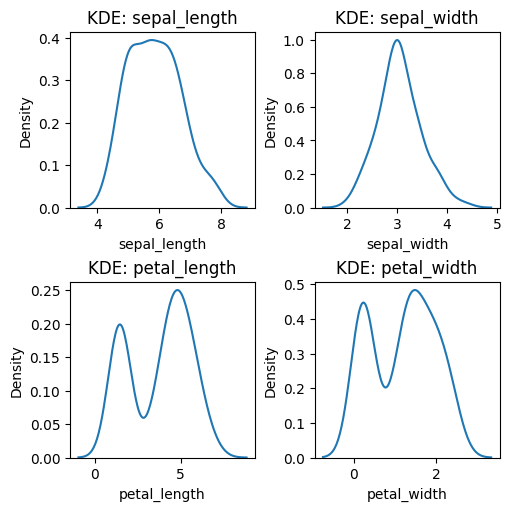

In [5]:
fig, ax = plt.subplots(2,2, figsize=(5,5), constrained_layout=True)
ax = np.ravel(ax)

for i in range(len(ax)):
    x = data.columns[i]
    sns.kdeplot(data[x], ax=ax[i])
    ax[i].set_title(f"KDE: {x}")
plt.show()

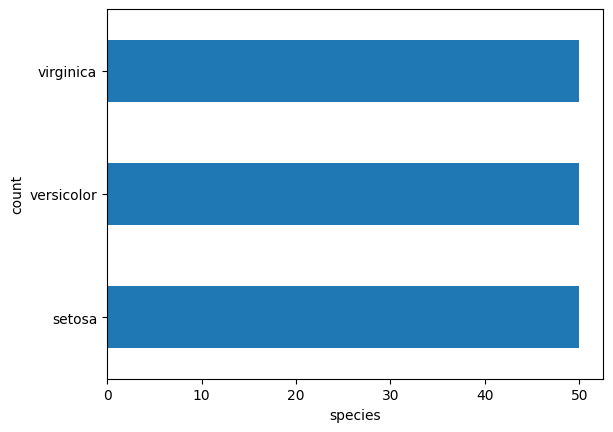

In [6]:
data['species'].value_counts().plot(kind='barh', xlabel='species', ylabel='count')
plt.show()

In [7]:
encoder = LabelEncoder()
data['species'] = encoder.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
X = data.iloc[:, :-1].values  # Features
Y = data.iloc[:, -1].values # Target variable

# Convert to PyTorch Tensor
X = torch.FloatTensor(X)
Y = torch.LongTensor(Y)

# Split the data into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=41)

In [10]:
# Create dataset class
class CustomDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

# Create dataset for train and test data
train_dataset = CustomDataset(X_train, Y_train)
test_dataset = CustomDataset(X_test, Y_test)

# Create the data loaders
batch_size=32
# We apply any transformations needed via dataloaders, in this case the data is already in tensors and not augmentations are applied.
train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [15]:
# Define the model/NeuralNetwork to train on data
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 8)
        self.fc2 = nn.Linear(8, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [39]:
# Create an instance of the NeuralNet model
model = IrisNet()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training Loop
losses = []
epochs = 1000
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in train_dataloader:

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and optimization
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward() # Compute gradients
        optimizer.step() # Update weights

        # Print statistics
        running_loss += loss.item()

    losses.append(running_loss)

    if epoch % 100 == 0:
        print(f'[{epoch+1}, {epochs}] loss: {running_loss / len(train_dataloader):.3f}')

[1, 1000] loss: 1.115
[101, 1000] loss: 0.517
[201, 1000] loss: 0.326
[301, 1000] loss: 0.221
[401, 1000] loss: 0.158
[501, 1000] loss: 0.125
[601, 1000] loss: 0.101
[701, 1000] loss: 0.087
[801, 1000] loss: 0.077
[901, 1000] loss: 0.070


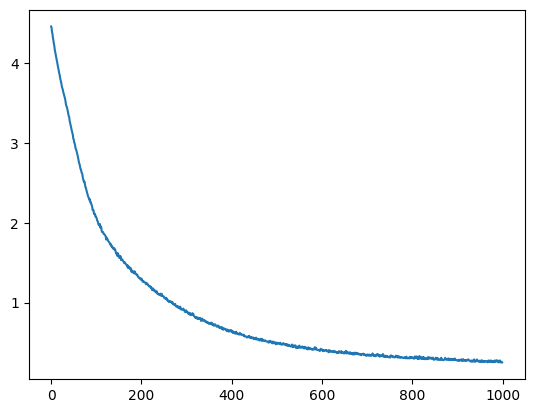

In [40]:
plt.plot(range(epochs), losses)

In [41]:
# Evaluation
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test set: {100 * correct / total}%')

Accuracy on the test set: 93.33333333333333%
